<a href="https://colab.research.google.com/github/sidpatondikar/Regression-Project/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Transport Demand Prediction

## Author : Siddharth Patondikar

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Regression Project/train_revised.csv')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [56]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [58]:
df.duplicated().value_counts()

False    51645
dtype: int64

In [59]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In the above data:
1. There are no duplicate rows
2. There are no null values

In [60]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [61]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [62]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


## Data Wrangling

In [63]:
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [64]:
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Dropping unnecessary columns

In [65]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [66]:
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

Merging the two df's on column ride_id.

In [67]:
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [68]:
df['travel_date'] = pd.to_datetime(df['travel_date'])
#df['travel_time'] = pd.to_datetime(df['travel_time'])

## Visualizations

In [69]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of tickets')

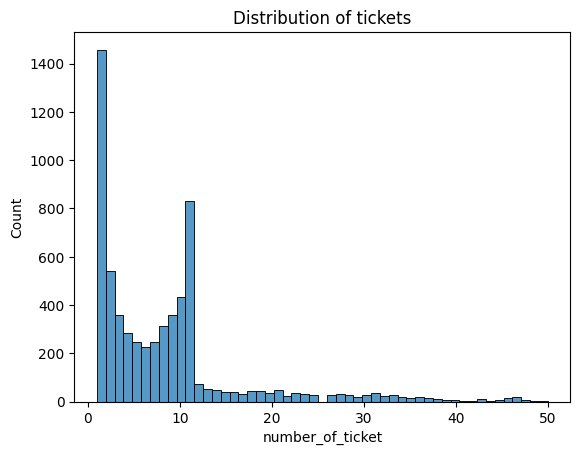

In [70]:
sns.histplot(df['number_of_ticket'])
plt.title("Distribution of tickets")

Text(0.5, 1.0, 'Types of cars')

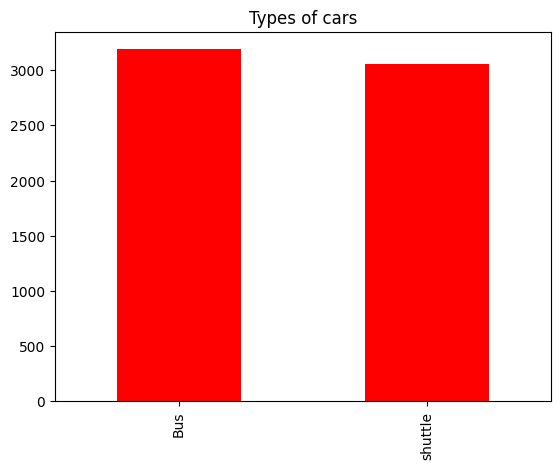

In [71]:
df['car_type'].value_counts().plot(kind='bar',color='red')
plt.title("Types of cars")

Text(0.5, 1.0, 'Max Capacities')

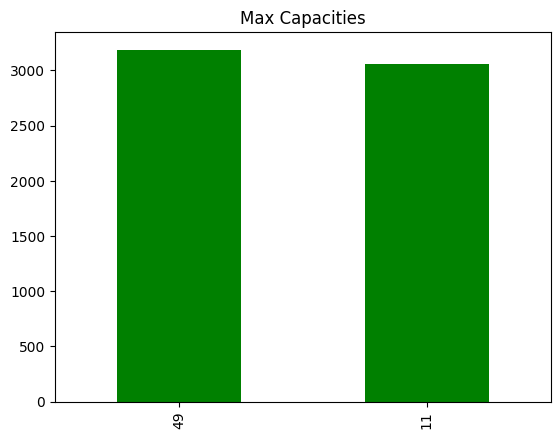

In [72]:
df['max_capacity'].value_counts().plot(kind='bar',color='green')
plt.title("Max Capacities")

Text(0.5, 1.0, 'Total tickets from each origin place')

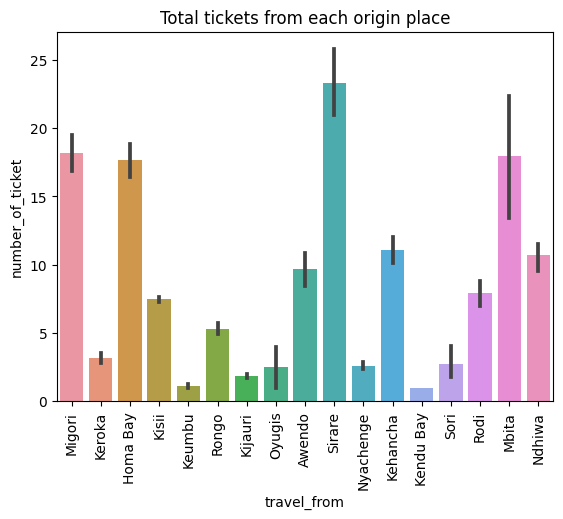

In [73]:
sns.barplot(data=df,x='travel_from',y='number_of_ticket')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')

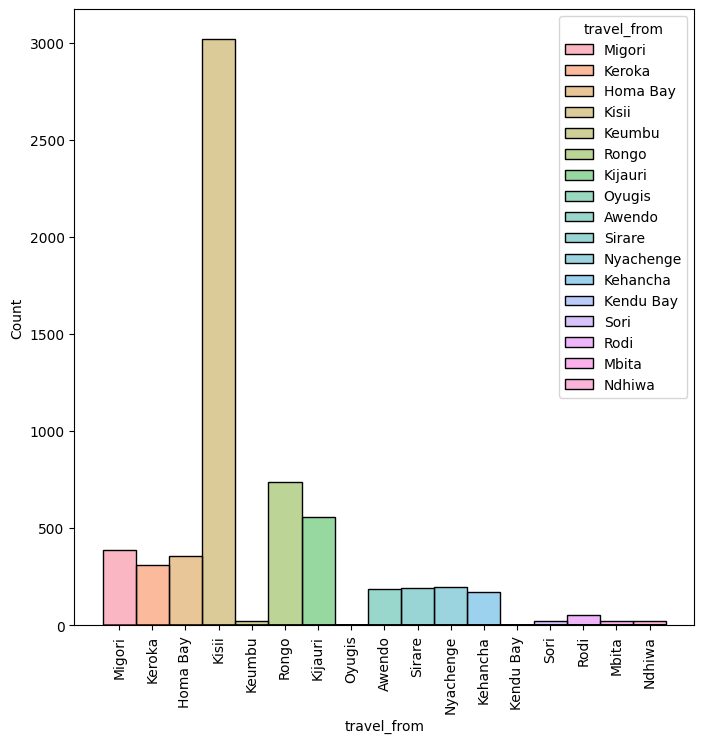

In [74]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='travel_from',hue='travel_from')
plt.xticks(rotation=90)
plt.show()

In [75]:
df_copy = df.copy()

In [76]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,2017-10-17,7:15,Migori,Bus,49,1


In [77]:
df_copy['travel_month'] = df_copy['travel_date'].dt.month
df_copy['travel_year'] = df_copy['travel_date'].dt.year
df_copy['travel_day_of_month'] = df_copy['travel_date'].dt.day
df_copy['travel_day_of_year'] = df_copy['travel_date'].dt.dayofyear
df_copy['travel_day_of_week'] = df_copy['travel_date'].dt.dayofweek
df_copy['travel_hour'] = pd.to_datetime(df_copy['travel_time']).dt.hour
df_copy['quarter'] = df_copy['travel_date'].dt.quarter
df_copy['is_weekend'] = df_copy['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

In [78]:
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

In [79]:
df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [80]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7:12,Migori,Bus,49,1,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7:12,Migori,Bus,49,31,11,2017,27,331,0,7,4,0,mor


<Axes: xlabel='travel_day_of_week', ylabel='Count'>

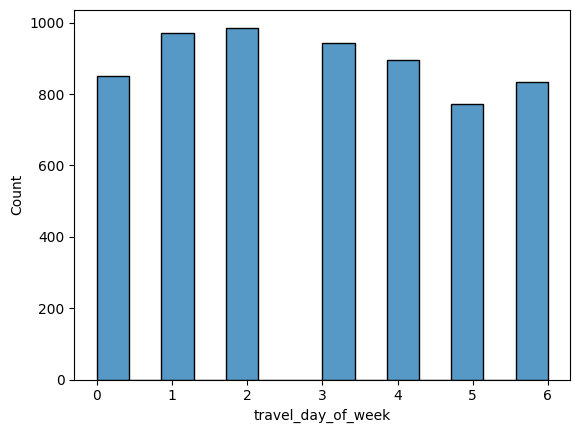

In [81]:
sns.histplot(df_copy['travel_day_of_week'])

<Axes: xlabel='travel_day_of_week', ylabel='number_of_ticket'>

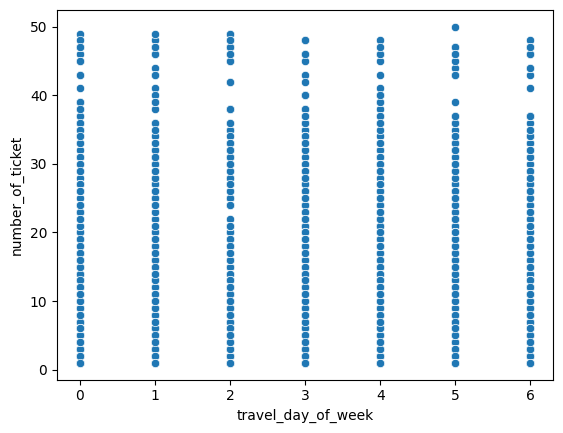

In [82]:
sns.scatterplot(data=df_copy, x='travel_day_of_week',y='number_of_ticket')

<Axes: xlabel='travel_day_of_month', ylabel='Count'>

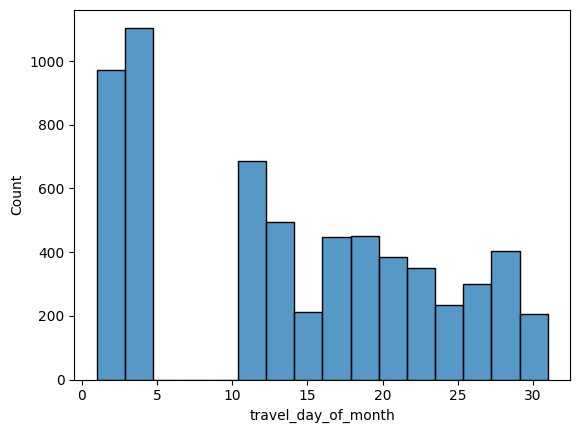

In [83]:
sns.histplot(df_copy['travel_day_of_month'])

<Axes: xlabel='travel_day_of_month', ylabel='number_of_ticket'>

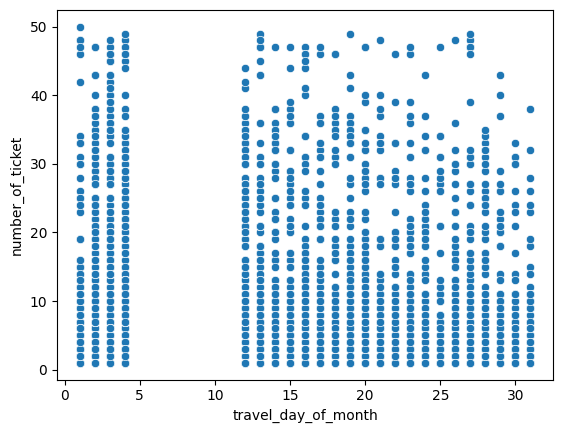

In [84]:
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='travel_month', ylabel='Count'>

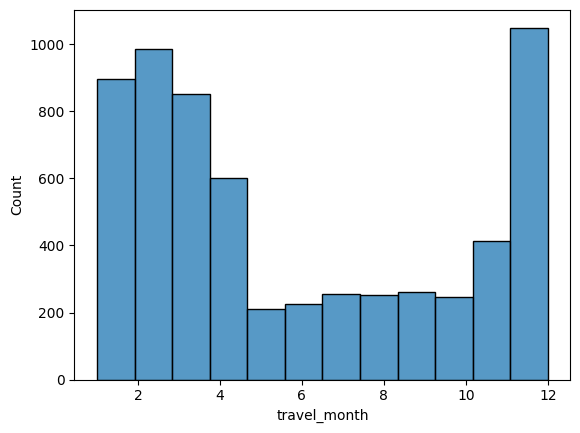

In [85]:
sns.histplot(df_copy['travel_month'],bins=12)

<Axes: xlabel='travel_hour', ylabel='number_of_ticket'>

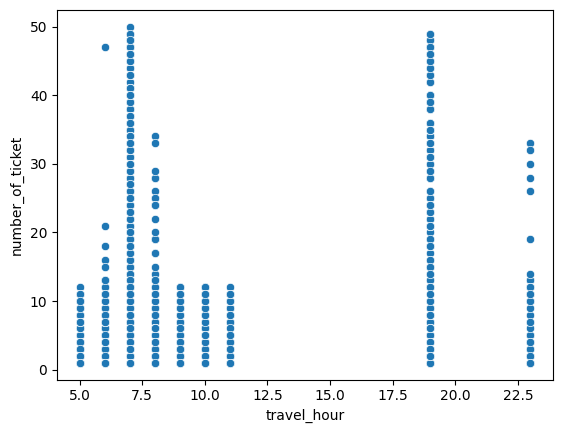

In [86]:
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='time_period_of_day', ylabel='number_of_ticket'>

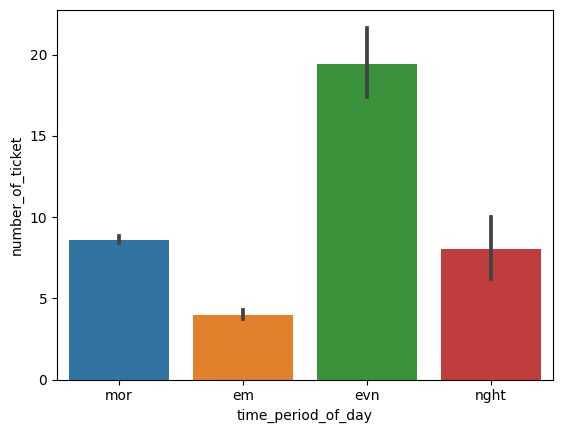

In [87]:
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket')

<Axes: xlabel='travel_day_of_year', ylabel='number_of_ticket'>

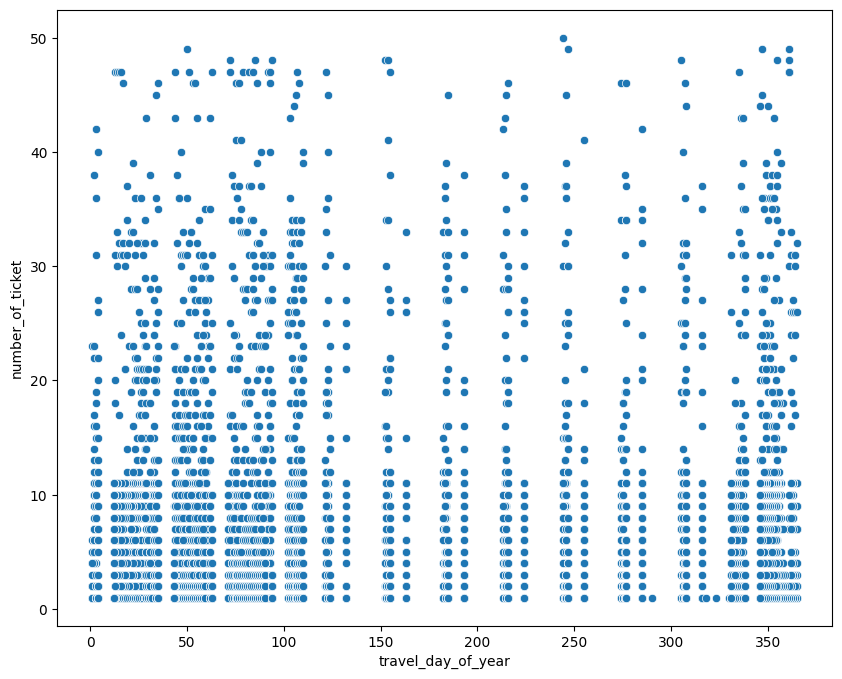

In [88]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_copy, x='travel_day_of_year',y='number_of_ticket',cmap='viridis')

From the above charts we can see that:

1. Most number of tickets are sold in the months of December (12), January(1) and February (2).

2. There is a gap in number of tickets sold between 5th and 11th of the month. We can assume public transport remains closed these days.

3. Most tickets were sold  on Mondays (1) and Tuesdays (2), this accounted for as there are first working days of the week

4. In the day, most tickets are sold at 7AM and close to 7PM. This can be because people going to and returning from work in Nairobi at these times. Similarly, there are no tickets sold between 12PM and 5:30 PM.

5. Most number of tickets are sold in evening followed by morning hours.

In [89]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,10,2017,17,290,1,7,4,0,mor


<Axes: >

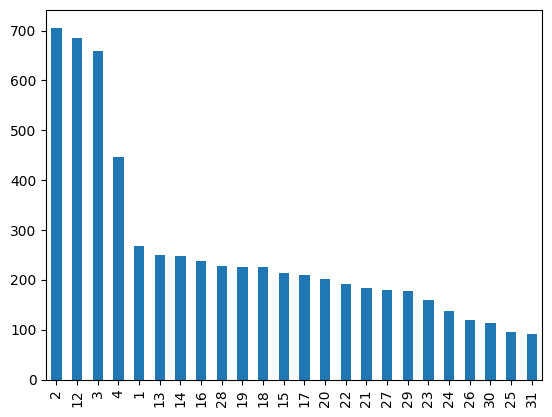

In [92]:
df_copy['travel_day_of_month'].value_counts().plot(kind='bar')
plt.title('Number of tickets for each day of the month')

{'mor': 4975, 'em': 988, 'evn': 225, 'nght': 61}


<Axes: >

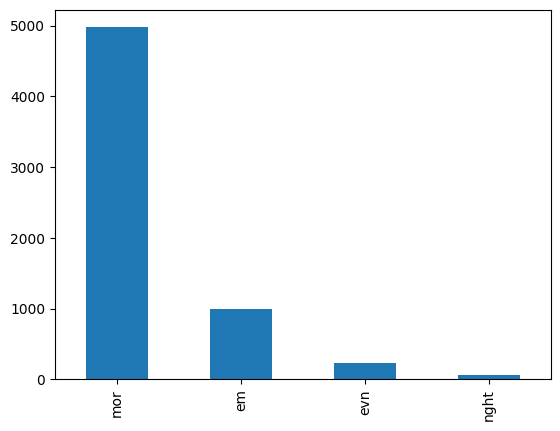

In [100]:
print(dict(df_copy.time_period_of_day.value_counts()))

df_copy['time_period_of_day'].value_counts().plot(kind='bar')

In [101]:
travel_time_period_counts = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(travel_time_period_counts))

# Creating a seperate column for giving day of a year wise weights for the hours column
travel_day_of_year_counts = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(travel_day_of_year_counts))

# Giving weights to the each days of the month based on the frequency of ticket bookings
travel_day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(travel_day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

## Model Building

In [109]:
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [110]:
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,travel_month,travel_year,travel_day_of_month,travel_day_of_year,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
0,1442,2017-10-17,7:15,1,49,1,10,2017,17,290,...,0,0,0,0,0,1,0,0,0,1
1,5437,2017-11-19,7:12,1,49,1,11,2017,19,323,...,0,0,0,0,0,1,0,0,1,0
2,5710,2017-11-26,7:05,1,49,1,11,2017,26,330,...,0,0,0,0,0,0,1,0,1,0
3,5777,2017-11-27,7:10,1,49,5,11,2017,27,331,...,0,0,0,0,0,0,1,0,1,0
4,5778,2017-11-27,7:12,1,49,31,11,2017,27,331,...,0,0,0,0,0,0,1,0,1,0


In [111]:
cols_to_drop = ['travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6249, 35)

In [112]:
y = final_df['number_of_ticket'].values
y.shape

(6249,)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import math

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [115]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [116]:
regressor.score(X_train,y_train)

0.38094046960675065

In [117]:
y_train_pred = regressor.predict(X_train)

print(f'MSE : {mean_squared_error(y_train_pred,y_train)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_train_pred,y_train))}')
print(f'R2 : {r2_score(y_train_pred,y_train)}')

MSE : 44.12665425856801
RMSE : 6.642789644311192
R2 : -0.6250820791823761


## Lasso

In [118]:
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [119]:
lasso.score(X_train, y_train)

0.34534258339796897

In [120]:
y_train_pred = regressor.predict(X_train)

print(f'MSE : {mean_squared_error(y_train_pred,y_train)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_train_pred,y_train))}')
print(f'R2 : {r2_score(y_train_pred,y_train)}')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 44.12665425856801
RMSE : 6.642789644311192
R2 : -0.6250820791823761
Adjusted R2 :  0.37657474654332856


## GridSearchCV on Lasso

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [123]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -44.98150587729956


In [124]:
y_train_pred = lasso_regressor.predict(X_train)

print(f'MSE : {mean_squared_error(y_train_pred,y_train)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_train_pred,y_train))}')
print(f'R2 : {r2_score(y_train_pred,y_train)}')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 44.18640512541355
RMSE : 6.647285545650461
R2 : -0.6411463593746625
Adjusted R2 :  0.37573058103988566


## Ridge

In [125]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [126]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -44.912871379635725


In [127]:
y_train_pred = ridge_regressor.predict(X_train)

print(f'MSE : {mean_squared_error(y_train_pred,y_train)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_train_pred,y_train))}')
print(f'R2 : {r2_score(y_train_pred,y_train)}')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 44.2013574052166
RMSE : 6.648410141170339
R2 : -0.6982604833110895
Adjusted R2 :  0.37551933391538483
